In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from sklearn import model_selection
from sklearn import metrics
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
PATH='data/Trivago/'
train_i=pd.read_csv(f'{PATH}train_set.csv',low_memory=False)
test_i=pd.read_csv(f'{PATH}test_set.csv',low_memory=False)

In [3]:
train_i.tail()

,id,yyear,week_of_year,advertiser_id,market,hotel_id,clicks,cost,bookings,top_pos,...,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
595843,201734IM121814828828,2017,34,1218,IM,14828828,6,3381,0,193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26
595844,201728IM121814828828,2017,28,1218,IM,14828828,2,2024,0,225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26
595845,201742IM8414828828,2017,42,84,IM,14828828,2,828,0,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26
595846,20181IM135614828828,2018,1,1356,IM,14828828,2,2392,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26
595847,201740IM512414828828,2017,40,5124,IM,14828828,14,8694,4,288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,26


In [4]:
test_i.tail()

,id,yyear,week_of_year,advertiser_id,market,hotel_id,clicks,cost,bookings,top_pos,...,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
10450,20187IM53107132024,2018,7,5310,IM,7132024,6,6900,NaN,31,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,112,101,135
10451,20187IM13567132024,2018,7,1356,IM,7132024,1,1127,NaN,22,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,112,101,135
10452,20187IM60187132024,2018,7,6018,IM,7132024,3,2070,NaN,6,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,112,101,135
10453,20187IM135610261800,2018,7,1356,IM,10261800,303,503907,NaN,2230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,34
10454,20187IM121810261800,2018,7,1218,IM,10261800,1,506,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,34


In [5]:
train_i.drop(columns='market',inplace=True)
test_i.drop(columns='market',inplace=True)

In [6]:
train_i['health_resortrehab_hotel'].fillna(2,inplace= True)
train_i['club_club_hotel'].fillna(2,inplace= True)
train_i['airport_hotel'].fillna(2,inplace= True)
train_i['senior_hotel'].fillna(2,inplace= True)
train_i['eco_friendly_hotel'].fillna(2,inplace= True)
train_i['spa_hotel'].fillna(2,inplace= True)
train_i['country_hotel'].fillna(2,inplace= True)
train_i['convention_hotel'].fillna(2,inplace= True)
train_i['beach_front_hotel'].fillna(2,inplace= True)
train_i['luxury_hotel'].fillna(2,inplace= True)
train_i['eco_friendly_hotel'].fillna(2,inplace= True)
train_i['family_hotel'].fillna(2,inplace= True)
train_i['city_hotel_centrally_located'].fillna(0,inplace= True)

In [7]:
test_i['health_resortrehab_hotel'].fillna(2,inplace= True)
test_i['club_club_hotel'].fillna(2,inplace= True)
test_i['airport_hotel'].fillna(2,inplace= True)
test_i['senior_hotel'].fillna(2,inplace= True)
test_i['eco_friendly_hotel'].fillna(2,inplace= True)
test_i['spa_hotel'].fillna(2,inplace= True)
test_i['country_hotel'].fillna(2,inplace= True)
test_i['convention_hotel'].fillna(2,inplace= True)
test_i['beach_front_hotel'].fillna(2,inplace= True)
test_i['luxury_hotel'].fillna(2,inplace= True)
test_i['eco_friendly_hotel'].fillna(2,inplace= True)
test_i['city_hotel_centrally_located'].fillna(0,inplace= True)

In [8]:
train_i.head()

,id,yyear,week_of_year,advertiser_id,hotel_id,clicks,cost,bookings,top_pos,beat,...,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
0,201716IM512425060,2017,16,5124,25060,2,1104,0,1,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,105,41,269
1,20176IM135625060,2017,6,1356,25060,34,33281,11,174,37.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,105,41,269
2,201728IM512425060,2017,28,5124,25060,3,2001,0,0,24.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,105,41,269
3,201726IM135625060,2017,26,1356,25060,218,282394,21,1467,55.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,105,41,269
4,201737IM107125060,2017,37,1071,25060,5,4600,0,42,NaN,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,105,41,269


In [9]:
test_i.head()

,id,yyear,week_of_year,advertiser_id,hotel_id,clicks,cost,bookings,top_pos,beat,...,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
0,20187IM592213442,2018,7,5922,13442,3,690,NaN,0,0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
1,20187IM107113442,2018,7,1071,13442,20,28060,NaN,451,4,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
2,20187IM556813442,2018,7,5568,13442,2,1196,NaN,2,194,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
3,20187IM135613442,2018,7,1356,13442,3,4002,NaN,1,0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
4,20187IM603013442,2018,7,6030,13442,27,38502,NaN,518,262,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299


In [10]:
train_i.columns[train_i.isna().any()].tolist()

['beat', 'meet', 'lose', 'rating', 'last_renovation']

In [11]:
train_i['beat'].fillna(train_i['beat'].median(),inplace=True)
train_i['meet'].fillna(train_i['meet'].median(),inplace=True)
train_i['lose'].fillna(train_i['lose'].median(),inplace=True)
train_i['rating'].fillna(train_i['rating'].median(),inplace=True)
train_i['last_renovation'].fillna(train_i['last_renovation'].median(),inplace=True)

In [12]:
train_i.isna().any()

id                              False
yyear                           False
week_of_year                    False
advertiser_id                   False
hotel_id                        False
clicks                          False
cost                            False
bookings                        False
top_pos                         False
beat                            False
meet                            False
lose                            False
impressions                     False
city_id                         False
stars                           False
rating                          False
distance_to_city_centre         False
poi_image                       False
longitude                       False
latitude                        False
last_renovation                 False
spa_hotel                       False
country_hotel                   False
convention_hotel                False
beach_front_hotel               False
luxury_hotel                    False
city_hotel_c

In [13]:
test_i.columns[test_i.isna().any()].tolist()

['bookings', 'rating', 'last_renovation', 'family_hotel']

In [14]:
test_i['rating'].fillna(test_i['rating'].median(),inplace=True)
test_i['last_renovation'].fillna(test_i['last_renovation'].median(),inplace=True)
test_i['city_hotel_centrally_located'].fillna(test_i['city_hotel_centrally_located'].median(),inplace=True)

In [15]:
test_i.head()

,id,yyear,week_of_year,advertiser_id,hotel_id,clicks,cost,bookings,top_pos,beat,...,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
0,20187IM592213442,2018,7,5922,13442,3,690,NaN,0,0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
1,20187IM107113442,2018,7,1071,13442,20,28060,NaN,451,4,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
2,20187IM556813442,2018,7,5568,13442,2,1196,NaN,2,194,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
3,20187IM135613442,2018,7,1356,13442,3,4002,NaN,1,0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299
4,20187IM603013442,2018,7,6030,13442,27,38502,NaN,518,262,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,180,90,299


In [16]:
test_i.any().isna()

id                              False
yyear                           False
week_of_year                    False
advertiser_id                   False
hotel_id                        False
clicks                          False
cost                            False
bookings                        False
top_pos                         False
beat                            False
meet                            False
lose                            False
impressions                     False
city_id                         False
stars                           False
rating                          False
distance_to_city_centre         False
poi_image                       False
longitude                       False
latitude                        False
last_renovation                 False
spa_hotel                       False
country_hotel                   False
convention_hotel                False
beach_front_hotel               False
luxury_hotel                    False
city_hotel_c

(array([5.91034e+05, 4.06200e+03, 5.61000e+02, 1.28000e+02, 4.30000e+01,
        1.00000e+01, 4.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  0. ,  55.7, 111.4, 167.1, 222.8, 278.5, 334.2, 389.9, 445.6,
        501.3, 557. ]),
 <a list of 10 Patch objects>)

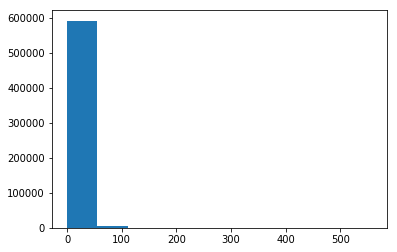

In [17]:
plt.hist(train_i['bookings'])

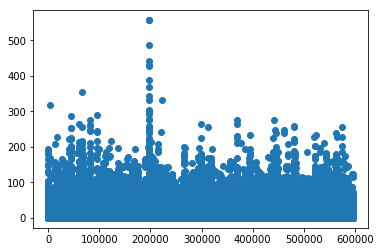

In [18]:
plt.scatter(np.arange(train_i['bookings'].size),train_i['bookings'])

**Inference:** There are outliers in the distribution of target values

**Fitting kernel density estimation plots to understand the distribution of target variable 'bookings'**

/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


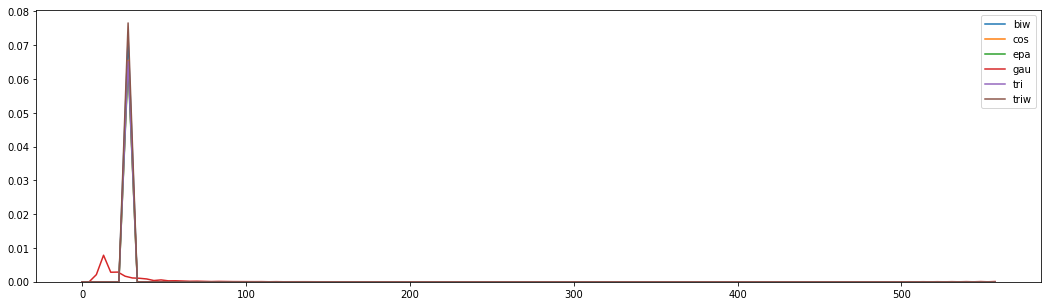

In [19]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
plt.figure(figsize=(18,5))
for kern in kernel_options:
    sns.kdeplot(train_i.bookings,kernel=kern,label=kern)

**Inference:** We could choose the limit for outliers to be approximately 50. These could be mass bookings made during new years eve or during long-holiday periods, which are not representative of the whole year. 

In [20]:
train_i[train_i.bookings>-1].shape,train_i[train_i.bookings>50].shape

((595848, 36), (5513, 36))

**5515 values out of 595848 are dropped. That is 0.9% of the values are considered to be outliers**

**Dropping the rows from the training dataset with target variable 'bookings' value more than 50.**

In [21]:
train_i.drop(index=train_i[train_i.bookings>50].index,inplace=True)

In [22]:
df_1=pd.DataFrame()
df_2=pd.DataFrame()

In [23]:
df_1['a']=train_i.week_of_year[train_i['yyear']==2017]
df_1['b']= train_i.bookings[train_i['yyear']==2017] 
df_2['a']=train_i.week_of_year[train_i['yyear']==2018]
df_2['b']= train_i.bookings[train_i['yyear']==2018] 

/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


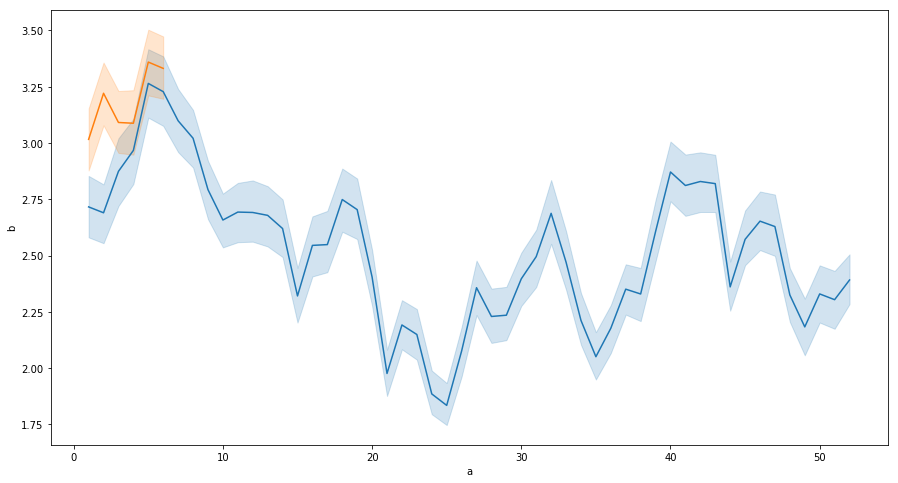

In [26]:
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="a", y="b",data=df_1)
sns.lineplot(x="a", y="b",data=df_2,ax=ax)

**Inferences:** 
- It is wise to chose the Trianing set as data from year 2017 and Cross validation set from year 2018 instead of a regular 80-20 split of the dataset. 
- It is evident from the graph above that the trend of bookings follows approximately same pattern in years 2017 and 2018. 

In [27]:
scaler = MinMaxScaler()

In [30]:
X_train=scaler.fit_transform( train_i[train_i['yyear']==2017].drop(columns=['bookings','id']))
Y_train = train_i.bookings[train_i['yyear']==2017]
X_cv = scaler.fit_transform(train_i[train_i['yyear']==2018].drop(columns=['bookings','id']))
Y_cv = train_i.bookings[train_i['yyear']==2018]
X_test = scaler.fit_transform(test_i.drop(columns=['bookings','id']))

/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [32]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_cv,Y_cv)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto',#'feature_name':X_train.columns.tolist()
            }

In [33]:
n_HP_points_to_test = 100
model = lgb.LGBMRegressor(max_depth=5, random_state=314, silent=True, metric='rmse', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=model, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='r2',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

- The above randomized grid search was run in another copy of the notebook to save time. 
- Best score is achieved with following parameters 

{'colsample_bytree': 0.5748561875650441, 'min_child_samples': 148, 'min_child_weight': 100.0, 'num_leaves': 33, 'reg_alpha': 50, 'reg_lambda': 5, 'subsample': 0.5431696497636938} 

In [35]:
model = lgbm.LGBMRegressor(
    objective='regression',
    max_depth=-1,
    learning_rate=0.007,
    n_estimators=30000,
    min_child_samples=148,
    subsample=0.5431696497636938,
    colsample_bytree=0.5748561875650441,
    reg_alpha=50,
    reg_lambda=5,
    random_state=np.random.randint(10e6),min_child_weight=100,num_leaves=33)

In [36]:
model.fit(X_train,Y_train,eval_set=(X_cv,Y_cv), eval_names=('fit', 'val'),
        eval_metric= 'rmse',
        early_stopping_rounds=200,
        #feature_name= X_train.columns.tolist(),
        verbose=False)


LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.5748561875650441, importance_type='split',
       learning_rate=0.007, max_depth=-1, min_child_samples=148,
       min_child_weight=100, min_split_gain=0.0, n_estimators=30000,
       n_jobs=-1, num_leaves=33, objective='regression',
       random_state=9041518, reg_alpha=50, reg_lambda=5, silent=True,
       subsample=0.5431696497636938, subsample_for_bin=200000,
       subsample_freq=0)

In [37]:
def rmse(x,y): 
    return np.sqrt(((x-y)**2).mean())

In [38]:
y_pred_on_cv = model.predict(X_cv, num_iteration= model.best_iteration_)

In [39]:
print(rmse(Y_cv,y_pred_on_cv))

3.8527550213231856


In [41]:
feature_importances = pd.DataFrame()

In [42]:
feature_importances['features'] = train_i.drop(columns=['bookings','id']).columns

In [43]:
feature_importances['importance']=model.feature_importances_

In [44]:
feature_importances.sort_values(by='importance',ascending=True)

,features,importance
0,yyear,0
15,poi_image,0
26,club_club_hotel,35
28,senior_hotel,95
29,eco_friendly_hotel,179
27,airport_hotel,476
22,beach_front_hotel,543
23,luxury_hotel,584
20,country_hotel,607
24,city_hotel_centrally_located,615


- It is evident from the table above that number of clicks has the highest importance. 

In [45]:
y_pred_on_test = model.predict(X_test, num_iteration= model.best_iteration_)

In [47]:
submission=pd.DataFrame()

In [48]:
submission['id']=test_i.id
submission['pred_bookings']=y_pred_on_test

In [50]:
submission.head()

,id,pred_bookings
0,20187IM592213442,0.106415
1,20187IM107113442,-0.285158
2,20187IM556813442,0.042647
3,20187IM135613442,0.381736
4,20187IM603013442,0.785480


In [55]:
submission.to_csv('submission.csv',index=False)